In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['pdf.fonttype'] = 42

In [2]:
from src.DMS_Profile import Targeted_DMS_Profile, targeted_combine_profiles, Genome
from src.dms_utils import sliding_corrcoeff, gini
from scipy.stats import linregress
from matplotlib.gridspec import GridSpec
from src.pydscatter import dscatter_plot
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as mplc

In [3]:
def get_corr_vec(rea1, rea2, mask, w):
    # wrapper for sliding_corrcoeff() to handle NaNs
    mask_join = (rea1 == rea1) & (rea2 == rea2) & mask
    r = sliding_corrcoeff(rea1[mask_join], rea2[mask_join], w)
    _, _, r_value, _, _ = linregress(rea1[mask_join], rea2[mask_join])
    x = np.arange(1, len(mask)+1)[mask_join]
    return(x, r, r_value)

def gini_windows(rea, mask, w, min_n=20):
    ginis = []
    x = []
    for window in range(len(rea)-w):
        if len((rea[window:window+w])[mask[window:window+w]]) >= min_n:
            gini_w = gini((rea[window:window+w])[mask[window:window+w]])
            ginis.append(gini_w)
        else:
            ginis.append(np.nan)
        x.append((window+window+w)/2)
    return(x, ginis)

In [4]:
# load nascent and mature average rRNA data
genome_rrna = Genome('../data/genome/scer_chr_kan.FASTA', coords=(11, 451575, 458433), reverse=True)

wild_rib_1 = Targeted_DMS_Profile('../data/processed/rib_wild_1_rRNA_agg.pkl', 'wild_R1', genome_rrna, reverse=True)
wild_rib_2 = Targeted_DMS_Profile('../data/processed/rib_wild_2_rRNA_agg.pkl', 'wild_R2', genome_rrna, reverse=True) 
wild_rib_3 = Targeted_DMS_Profile('../data/processed/rib_wild_3_rRNA_agg.pkl', 'wild_R3', genome_rrna, reverse=True)
wild_rib = targeted_combine_profiles([wild_rib_1, wild_rib_2, wild_rib_3], 'wild', genome_rrna, per_exclude=5)

wild_nas_1 = Targeted_DMS_Profile('../data/processed/pro_wild_1_rRNA_agg.pkl', 'wild_R1', genome_rrna, reverse=True) 
wild_nas_2 = Targeted_DMS_Profile('../data/processed/pro_wild_2_rRNA_agg.pkl', 'wild_R2', genome_rrna, reverse=True)
wild_nas_3 = Targeted_DMS_Profile('../data/processed/pro_wild_3_rRNA_agg.pkl', 'wild_R3', genome_rrna, reverse=True)
wild_nas = targeted_combine_profiles([wild_nas_1, wild_nas_2, wild_nas_3], 'wild', genome_rrna, per_exclude=10)

/opt/homebrew/Caskroom/miniforge/base/envs/CoST/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [5]:
# ribosomal RNA secondary structure
dbr_18 = '...((((.........))))((((.(((((((.(((((((((.....(((.(((..((...(((..(.((..........)))..))))).....((((.......(((((((..((..(((((((............(((((....(((((((.....)))))))....)))))......(((((((((....)))))))))(((.(((((((.......(((((.(((....)))...))))).....))))))).)..))...((((.((((.....))))))))..))))))).))))))))).(((..(.(((....((((((((.......))))))))))).....))))...((((((((....))))...))))))))((((((..........)))))).((((....))))...)))))))......(.(((...(((((...))))).)))).)).))))))....((((..(((((((....)))))))..).))).....((((((((.......))))))))........((.((......(.((((((..(((....)))....))))))))).)).))))))))))).....(...(((.......((((...(((.((....((((((((((((.((((.(((.....)))...)))).....))))))))))))....((((((....(((((((((.....)))))))))....))))))..(((((((((.......(((..(.(...).)..(((.....)))...)))......)))))..)))).....(.((....(.((.(((.............))).))..)..)).)..))...((((((((((.((((((((((((((((((((...(((......)))......))))))))))))....(..((....)))))))))))))))).))))..))))...)))).(..((((((...(((.(((((.........))))).)))))))))..).......((((((.(((..(((((((...((..........)))))))))..)))...((....))...)))....))).))))(((((.((.((((....)))))))))))........(((((.(((((((..((..(((((((((((((((((.(.)((((........))))........(((((((....(((((....(((((((((..........)))))))))..))))).(.((.((((..((((((((((..(((((((((....)))..((((......))))..)))))).....((((((((.((((..(((((.((((((....))))))...)))))..))))))).((.(((((((...)))))))))....)))))...))))).)))...).))))))))....)))))))...)).)))))))))((..(((((((.(...(((.....(((.((((....)))).)))....)))....).)))))))....).((((((((((((........))))))))))))..).))))))(...(((((((((.......)))))))))..)..))...)))))))))).))....((.((...(((((((((((.((((((((((((..(((((((((((((((((((((((((((....)))))))))))))))))))))))))))..)))))))))))))))))))))))....))..))....((((((((((....))))))))))........'
dbr_58 = '........................................((((((((......)))).....((((((....................)))).))...))))...(((...)))(((((((((....))))))))).....................'
dbr_25 = '..........................((((((.....((....))......))))).).........((....))..(((((......((.....)).....))))).((((..((((((((((((((((((...))))))))))))))))))....(((((((.((((((((((((((((((((...(.(((((....))))))..(...).(((.......)))....))))))))..))))))))....)))))))))))........(((((((........))))))).....(((((........)))))..)))).................................((....))...............((((....))))..................................((((((((((((.(..(((((...((((..((((((((.....))))))))......))))...))))).(((((((((((((((((((((((......((((((((..((((((((((....))))))..)))).))))))))....))))).))))))))))).......(((....))).....)))))))..).))))))))))))..((((........))))((((((....(((((((((((((..((((..((((.....))))..))))...((....)).......(((((..(((((....)))))...))))).((((((((...((....))...))).))).))....)))))))))))))..((((...((((((...((((((((((((.((((...(((((((....)))))))....))))...((((.((.((........))))))))..).))))))))))).(((....))).......))))))......))))..((((((....(((((....))))).(((((((((.......((((((((..(.(((....((((((((((..((((((((.....))))))))))))))))))..)).).)..)))))))).(((((((((.........)))))))))...........)))))))).)...((((((((((.....))))))))))....(((......)))...(((((((...(((......(.((((((.................(((.((((((((((.......(((((.(((..(((.........)))..)))(...)(...((......)).).)))))...)))))))))))))...................))))))))))...)))))))(((((((((.........)))))))))....))))))(.((((((((.((......((((.((((....))))))))...))))))))))..).....))))))((((.((((.....((((((.......))))))((((.....(((((.....(((((((...((.....)).))))))).....(((.((...(((((.(((....))))))......(((((........))))).....))....))...(((((........)))))..((((.(((((((.....(((....))).......((((((...((((.(((((((.(((((((((.........))))))...(((((((..(((((((((((((.....)))))))))))))..)).)))))......(((((((....)))))))..)))...))))))).)))).........))))))............))))))))))).))).........((......))))))).((((.....))))..))))..((((....((((((((((((..............(((((...((....))....)))))((((((((((((((.((((((((((((((((((....(((((((((((((((((((.(((((((((((((....))))))))))))).))))))))))))).))))))....))))))))))(((((.....)))))....))))))))......)))))..)))))))))(...).......(((((((((..(((.........)))..(((((((((..((((.....))))..)..))))))))..((((.(((..((((((.(..(((....(((((....)))))....))))))))..)))))((((((.......))))))(...).((((.(...(.)).(((((((.)..))))))..)..)))..))))...)).)))))))....)))))))))))).))))))))))))....(((((........)))))..((((((((.(((.((.....(((((.(((((((.(((((..(((((((..((((((((((((((((((.........(((((..((....))............))))))))))))).))))))))))...(((((.....((((..(((((......)))))...............((((((....))))))..))))..))))).....)))))))...)))))..((((.....))).)((((((...........))))))..((..((((((((((.((((((.......))))))...))((......))....))))))))..(((((((((.......))))))))).(((....))).))..........((((((..((((.......)))))))))).........)))))..))))))).......(((..(((((((...((.......))...)))))))...)))..........(((((((((((..((((((((((....))))))))..)).(((((.....))))).....)))))..)..)))).).....(((((((....))).))))....))..)))))))))))..((((((((..((((.((((((((...............))))))))(((((...(((....(((((((((((....))))))..)))))...)))..)))))..(((....(((((..........)))))....))).))))....)))))))).......(((((((((((((................((((((.....))))))...............((((((((..(((((((((((......))))))))))))))))))).............)))))))))))))..((((((((((.......)))))....(((((((((.((..(..((((.((((((((......)))))))))))))...))....))).))))))..)))))..'
dbr_full = 701*'?' + dbr_18 + 361*'?' + dbr_58 + 232*'?' + dbr_25 + 210*'?'
mask_dat = np.array([True if i in [')', '(', '.'] else False for i in dbr_full])

## calculate sliding correlation coefficients
mask_acu = genome_rrna.mask_A()|genome_rrna.mask_C()|genome_rrna.mask_U() # joint mask for mature and nascent RNA

w = 50
x_nasvmat, r_nasvmat, r2_nasvmat = get_corr_vec(wild_nas.rat, wild_rib.rat, mask_acu, w)
x_nas,     r_nas    , r2_nas     = get_corr_vec(wild_nas_1.rat, wild_nas_2.rat, mask_acu, w)
x_mat,     r_mat    , r2_mat = get_corr_vec(wild_rib_1.rat, wild_rib_2.rat, mask_acu, w)

## calculate sliding gini index
w = 80
x_gini_nas, gini_nas = gini_windows(wild_nas.rat, mask_acu&wild_nas.mask, w, min_n=50)
x_gini_mat, gini_mat = gini_windows(wild_rib.rat, mask_acu&wild_rib.mask, w, min_n=50)

# Figure 3a, 3b

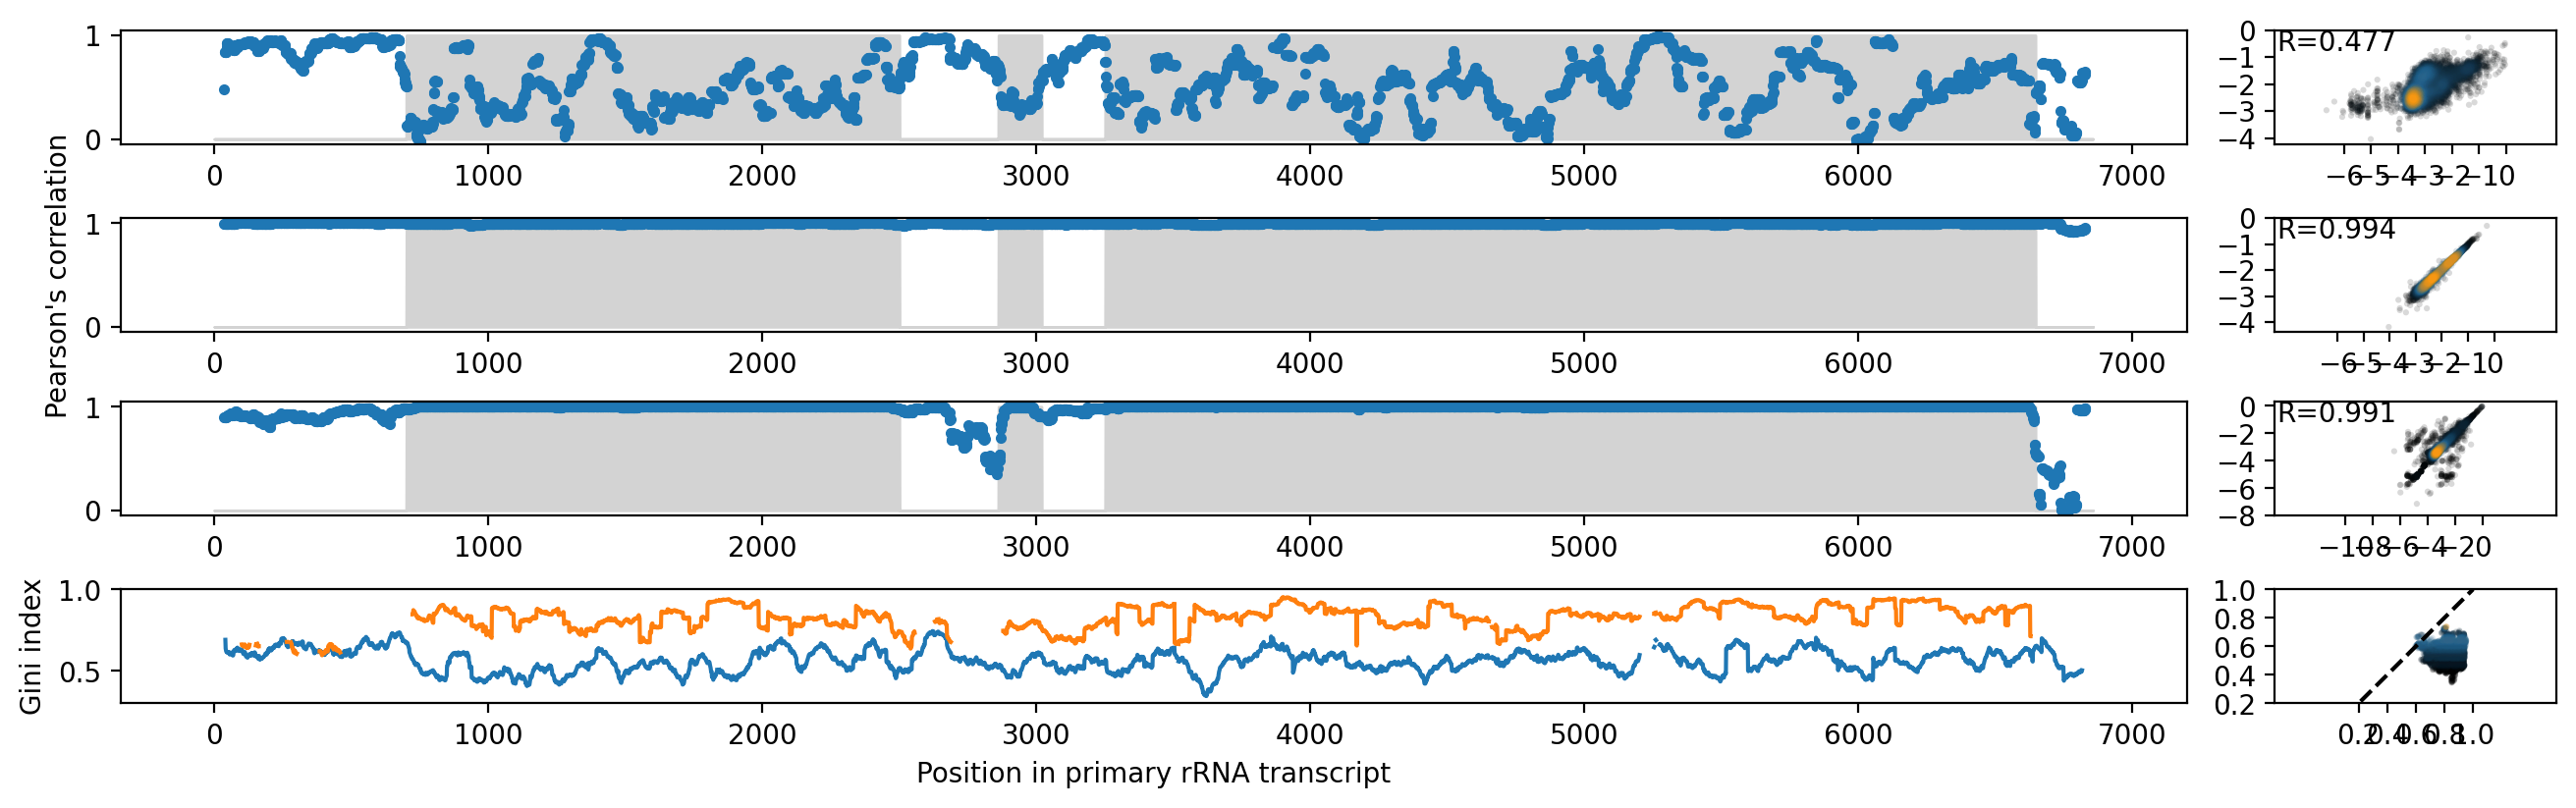

In [6]:
fig = plt.figure(layout="constrained", figsize=(13,4))

gs = GridSpec(4, 2, figure=fig, width_ratios=(0.88, 0.12))
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
ax4 = fig.add_subplot(gs[0, 1])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[3, 0], sharex=ax1)
ax8 = fig.add_subplot(gs[3, 1])

cmap = np.array(pd.read_csv('../cmap.txt', header=None))/255
cmap = mplc.ListedColormap(cmap)

ax1.fill_between(np.arange(0, len(mask_dat)), mask_dat, color='lightgray')
ax2.fill_between(np.arange(0, len(mask_dat)), mask_dat, color='lightgray')
ax3.fill_between(np.arange(0, len(mask_dat)), mask_dat, color='lightgray')
ax1.plot(x_nasvmat, r_nasvmat, '.')
ax2.plot(x_nas, r_nas, '.')
ax2.set_ylabel("Pearson's correlation")
ax3.plot(x_mat, r_mat, '.')

dscatter_plot(np.log10(wild_rib.rat[mask_acu]), np.log10(wild_nas.rat[mask_acu]), ax=ax4, order=True, alpha=0.15, markersize=5, edgecolors='none', rasterized=True, cmap=cmap)
ax4.set_aspect('equal', adjustable="datalim")
ax4.set_xticks(np.arange(-6, 1, 1))
ax4.set_yticks(np.arange(-4, 1, 1))
ax4.text(0.005, 0.82, f"R={r2_nasvmat:.3f}", transform=ax4.transAxes)
dscatter_plot(np.log10(wild_nas_1.rat[mask_acu]), np.log10(wild_nas_2.rat[mask_acu]), ax=ax5, order=True, alpha=0.15, markersize=5, edgecolors='none', rasterized=True, cmap=cmap)
ax5.set_aspect('equal', adjustable="datalim")
ax5.set_xticks(np.arange(-6, 1, 1))
ax5.set_yticks(np.arange(-4, 1, 1))
ax5.text(0.005, 0.82, f"R={r2_nas:.3f}", transform=ax5.transAxes)
dscatter_plot(np.log10(wild_rib_1.rat[mask_acu]), np.log10(wild_rib_2.rat[mask_acu]), ax=ax6, order=True, alpha=0.15, markersize=5, edgecolors='none', rasterized=True, cmap=cmap)
ax6.set_aspect('equal', adjustable="datalim")
ax6.set_xticks(np.arange(-10, 2, 2))
ax6.set_yticks(np.arange(-8, 2, 2))
ax6.text(0.005, 0.82, f"R={r2_mat:.3f}", transform=ax6.transAxes)

ax7.plot(x_gini_nas, gini_nas)
ax7.plot(x_gini_mat, gini_mat)
ax7.set_ylim([0.3, 1])
ax7.set_xlabel('Position in primary rRNA transcript')
ax7.set_ylabel('Gini index')
dscatter_plot(gini_mat, gini_nas, ax=ax8, order=True, alpha=0.15, markersize=5, edgecolors='none', rasterized=True, cmap=cmap)
ax8.plot([0, 1], [0,  1], '--k')
ax8.set_aspect('equal', adjustable="datalim")
ax8.set_xlim([0.3, 1])
ax8.set_ylim([0.3, 1])
ax8.set_xticks(np.arange(0.2, 1.1, 0.2))
ax8.set_yticks(np.arange(0.2, 1.1, 0.2))

plt.setp([ax1, ax2, ax3], ylim=[-0.05, 1.05])
plt.show()

# Figure S3a

In [7]:
from src.dms_utils import plot_structure, get_coords

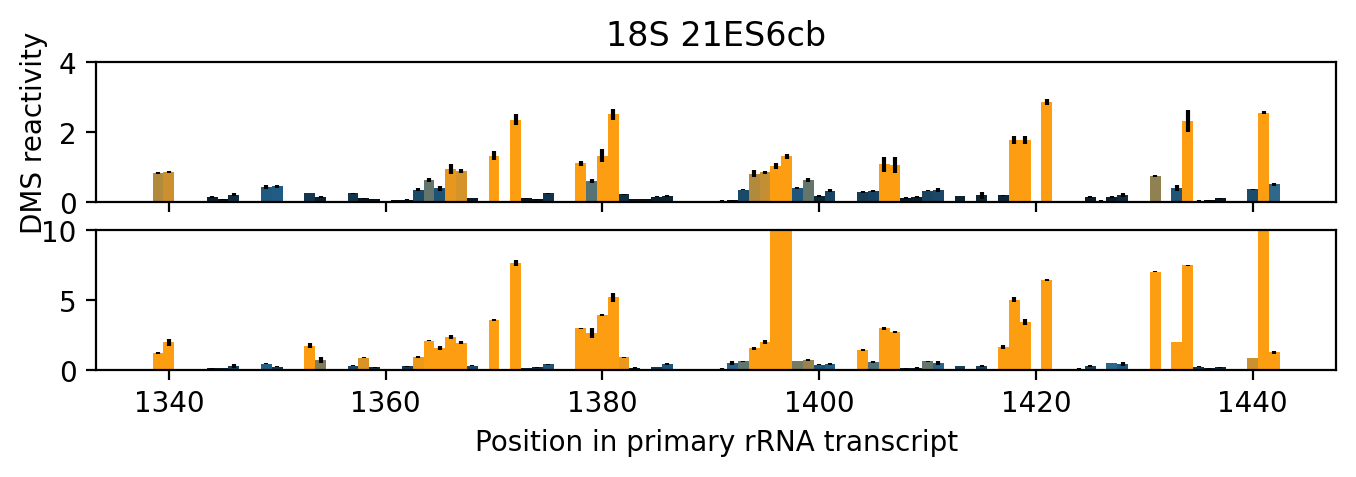

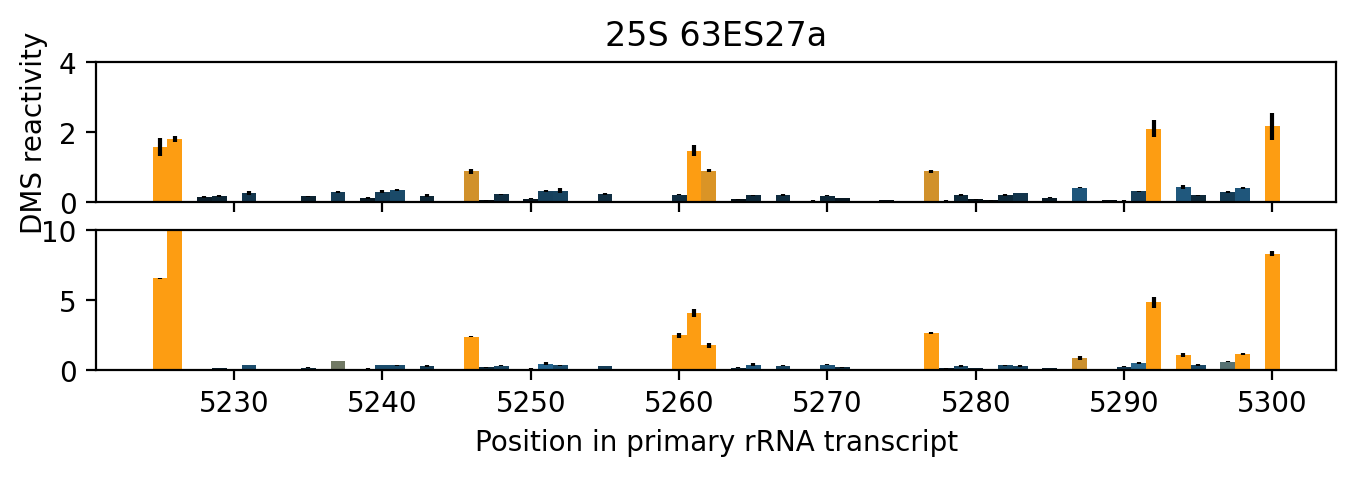

In [8]:
# plot DMS reactivities for high correlation regions

# 18S 21ES6cb
fig, axs = plt.subplots(2, 1, figsize=[8, 2], sharex=True)
coords = (1339, 1443)
x_18, y_nas_18, vec_norm_nas_18 = wild_nas.plot_profile(coords[0], coords[1], genome_rrna, axs[0], cmap_loc='../cmap.txt')
axs[0].set_ylim([0, 4])
axs[0].set_title('18S 21ES6cb')
axs[0].set_ylabel('DMS reactivity')
x_18, y_rib_18, vec_norm_rib_18 = wild_rib.plot_profile(coords[0], coords[1], genome_rrna, axs[1], cmap_loc='../cmap.txt')
axs[1].set_ylim([0, 10])
axs[1].set_xlabel('Position in primary rRNA transcript')
plt.show()

# 25S 63ES27a
fig, axs = plt.subplots(2, 1, figsize=[8, 2], sharex=True)
coords = (5225, 5301)
coords_tru_18 = get_coords(genome_rrna.seq[coords[0]:coords[1]], dbr_full[coords[0]:coords[1]])
x_25, y_nas_25, vec_norm_nas_25 = wild_nas.plot_profile(coords[0], coords[1], genome_rrna, axs[0], cmap_loc='../cmap.txt')
axs[0].set_ylim([0, 4])
axs[0].set_title('25S 63ES27a')
axs[0].set_ylabel('DMS reactivity')
x_25, y_rib_25, vec_norm_rib_25 = wild_rib.plot_profile(coords[0], coords[1], genome_rrna, axs[1], cmap_loc='../cmap.txt')
axs[1].set_ylim([0, 10])
axs[1].set_xlabel('Position in primary rRNA transcript')
plt.show()

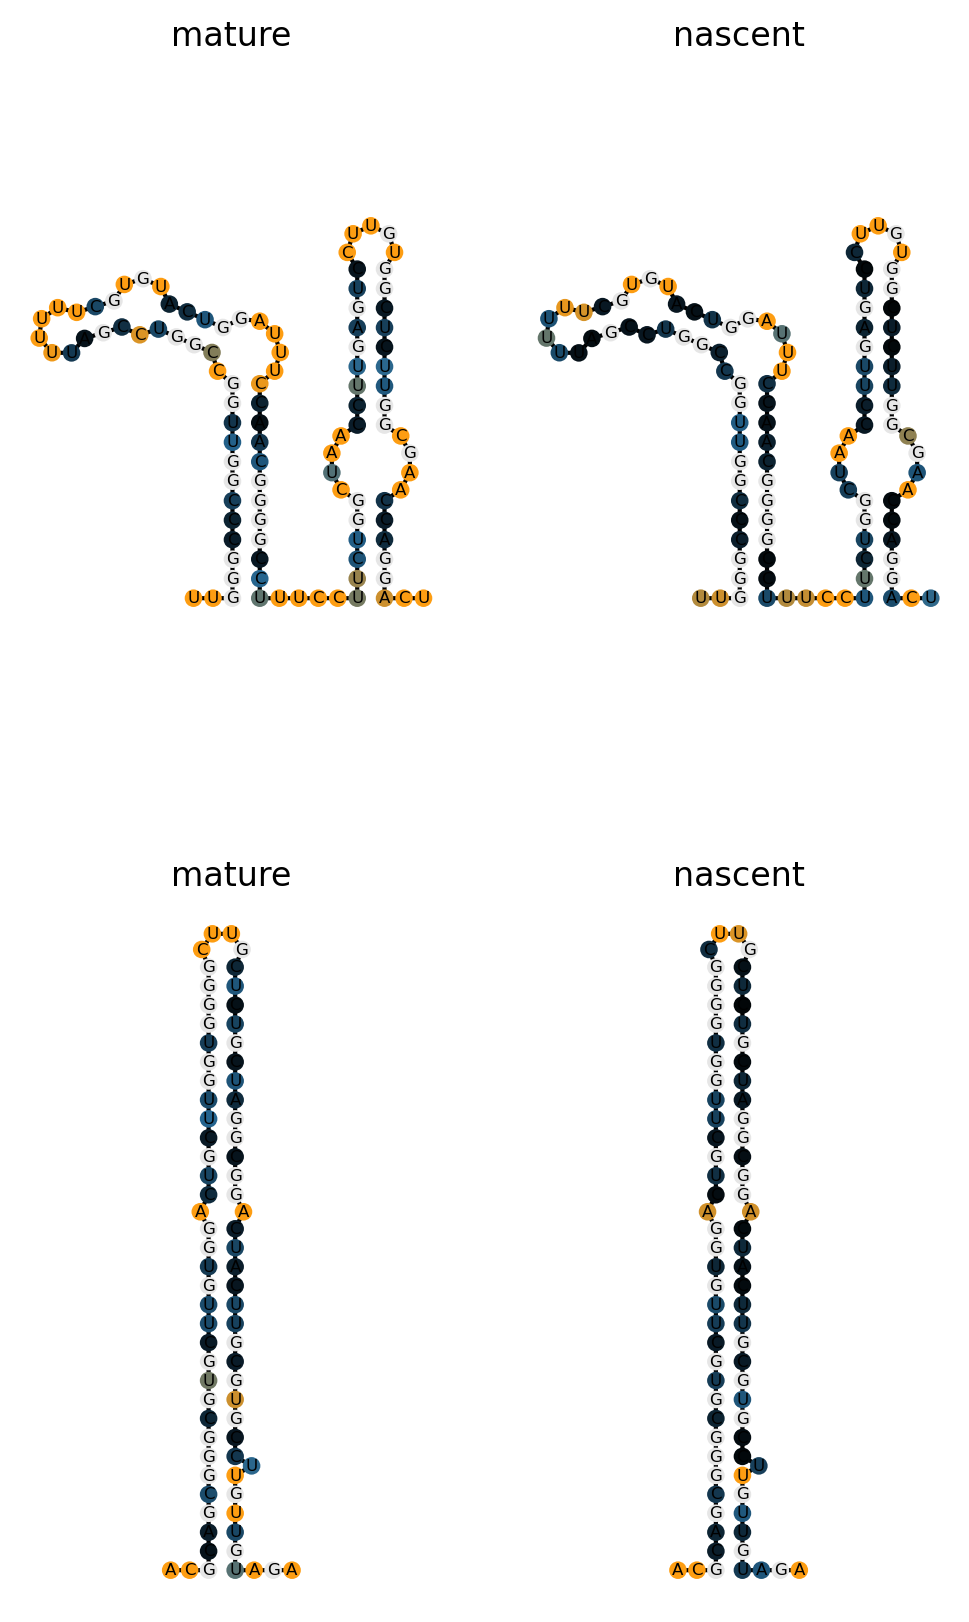

In [9]:
# plot RNA structures for high correlation regions

fig, axs = plt.subplots(2, 2, figsize=(6, 10))
fig.patch.set_facecolor('white')
axs = axs.flatten()

# 18S 21ES6cb
coords_tru_18 = get_coords(genome_rrna.seq[1339:1443], dbr_full[1339:1443])
plot_structure(coords_tru_18, genome_rrna.seq[1339:1443], y_rib_18*vec_norm_rib_18, (~genome_rrna.mask_G()&wild_nas.mask)[1339:1443], axs=axs[0], circle_size=40, text_size=6, cmap_loc='../cmap.txt')
plot_structure(coords_tru_18, genome_rrna.seq[1339:1443], y_nas_18*vec_norm_nas_18, (~genome_rrna.mask_G()&wild_nas.mask)[1339:1443], axs=axs[1], circle_size=40, text_size=6, cmap_loc='../cmap.txt')
axs[0].set_title('mature')
axs[1].set_title('nascent')

# 25S 63ES27a
coords_tru_25 = get_coords(genome_rrna.seq[5225:5301], dbr_full[5225:5301])
plot_structure(coords_tru_25, genome_rrna.seq[5225:5301], y_rib_25*vec_norm_rib_25, (~genome_rrna.mask_G()&wild_rib.mask)[5225:5301], axs=axs[2], circle_size=40, text_size=6, cmap_loc='../cmap.txt')
plot_structure(coords_tru_25, genome_rrna.seq[5225:5301], y_nas_25*vec_norm_nas_25, (~genome_rrna.mask_G()&wild_rib.mask)[5225:5301], axs=axs[3], circle_size=40, text_size=6, cmap_loc='../cmap.txt')
axs[2].set_title('mature')
axs[3].set_title('nascent')


plt.show()

# Figure S3b and S3c

In [10]:
from src.DMS_Profile import Targeted_DMS_Profile, targeted_combine_profiles
from src.dms_utils import rsample
import pickle

In [11]:
# load nascent and mature average rRNA data
genome_rrna = Genome('../data/genome/scer_chr_kan.FASTA', coords=(11, 451575, 458433), reverse=True)

wild_nas_1 = Targeted_DMS_Profile('../data/processed/pro_wild_1_rRNA_agg.pkl', 'wild_R1', genome_rrna, reverse=True) 
wild_nas_2 = Targeted_DMS_Profile('../data/processed/pro_wild_2_rRNA_agg.pkl', 'wild_R2', genome_rrna, reverse=True)
wild_nas_3 = Targeted_DMS_Profile('../data/processed/pro_wild_3_rRNA_agg.pkl', 'wild_R3', genome_rrna, reverse=True)
wild_nas_4 = Targeted_DMS_Profile('../data/processed/pro_wild_4_rRNA_agg.pkl', 'wild_R3', genome_rrna, reverse=True)
wild_nas_5 = Targeted_DMS_Profile('../data/processed/pro_wild_5_rRNA_agg.pkl', 'wild_R3', genome_rrna, reverse=True)
wild_nas_6 = Targeted_DMS_Profile('../data/processed/pro_wild_6_rRNA_agg.pkl', 'wild_R3', genome_rrna, reverse=True)
wild_nas_7 = Targeted_DMS_Profile('../data/processed/pro_wild_7_rRNA_agg.pkl', 'wild_R3', genome_rrna, reverse=True)
wild_nas_8 = Targeted_DMS_Profile('../data/processed/pro_wild_8_rRNA_agg.pkl', 'wild_R3', genome_rrna, reverse=True)
wild_nas = targeted_combine_profiles([wild_nas_1, wild_nas_2, wild_nas_3, wild_nas_4, wild_nas_5, wild_nas_6, wild_nas_7, wild_nas_8], 'wild', genome_rrna, per_exclude=10)

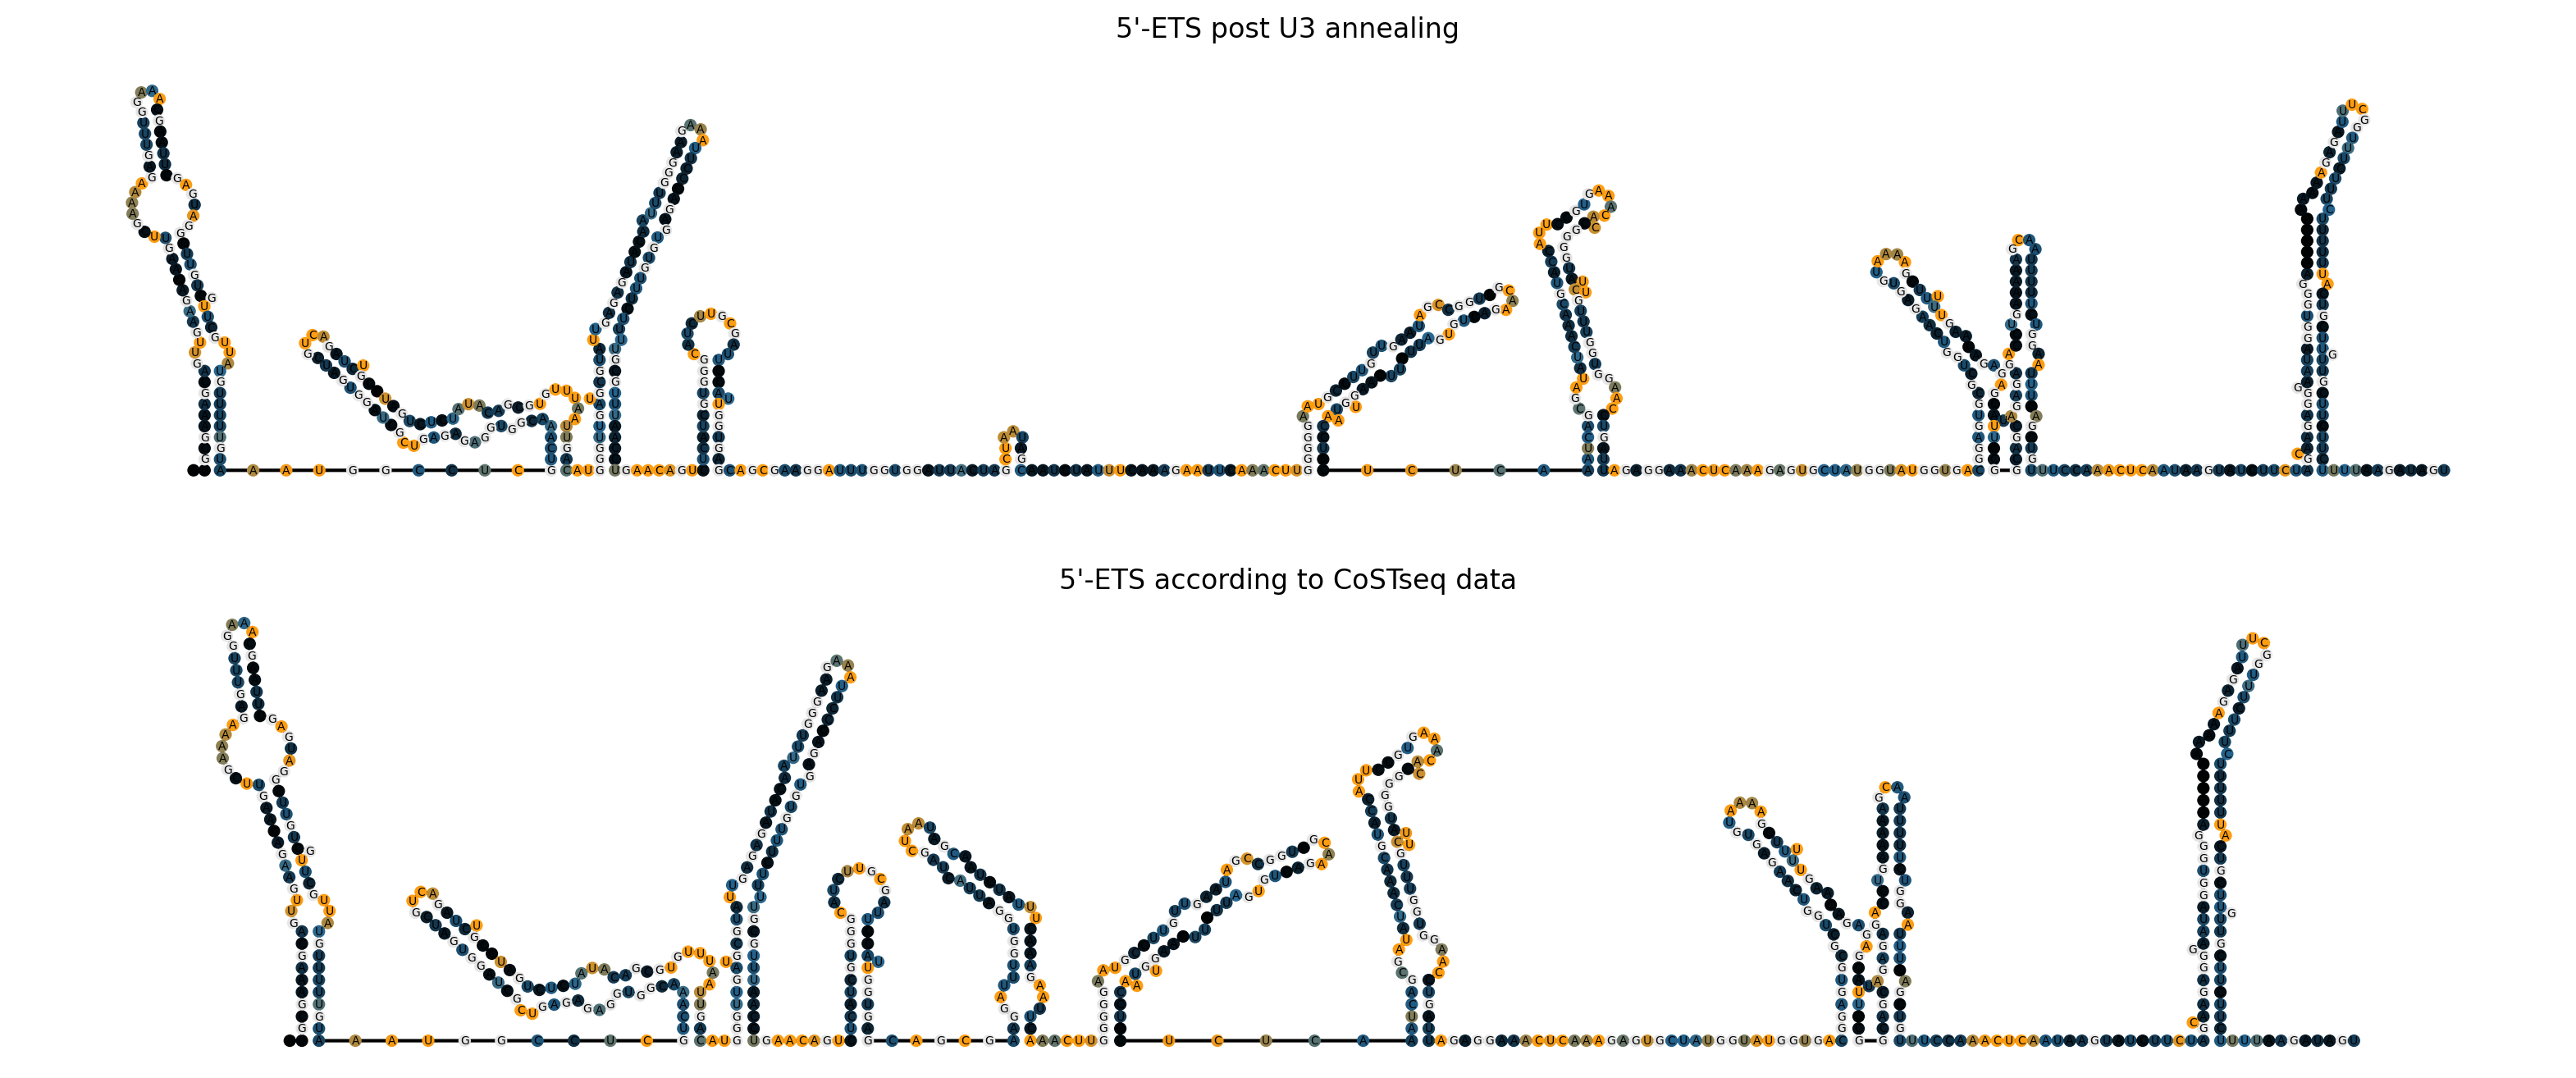

In [12]:
# known 5'ETS structure
ets_dbr_kno = '.((((((((((..(((((((((((.......(((((((....)))))))......))))))).))))...)))))))))).........((((((((.((...((((..(((((((((((....)))).)))))))))))...)).)))......)))))..(((((((.(((((..((((((((((.((((((((....)))))))).)))))))))).)))))))))))).......(((((((((((...........)))).))))))).......|||||||||||.......(((...))).........................(((((..(((((((..((((...(((((....)))))..))))..)))).)).)))))).....((((((...(((((((((((((...((((.....).))))))).).))))))))....)))))).|||||...||||||||||..............((((((((.(((.((((((((......)))).)))).)))...))).)))))(((((.((((..((.((((((....)))))).))..)))).)))))........................((.((((((.(((((((((.((((((..((((((((....)))))))).)))))).)))))).)))))))))))...........'

# structure prediction for the region of disagreement with known structure (nucleotides 274:331)
_, E, ets_dbr_pre = rsample(genome_rrna.seq[274:331], (wild_nas.rat*wild_nas.vec_norm)[274:331], (wild_nas.mask & ~genome_rrna.mask_G())[274:331], rnastructure_path='/Users/leo/Builds/RNAstructure/exe', md=9999, ns=10000, t=303.15)

# calculate coordinates for both 5'ETS variants
coords_kno = get_coords(genome_rrna.seq[1:701], ets_dbr_kno)
coords_pre = get_coords(genome_rrna.seq[1:701], ets_dbr_kno[:274] + ets_dbr_pre + ets_dbr_kno[331:])

# draw figure
fig, axs = plt.subplots(2, 1, figsize=(20, 8))
fig.patch.set_facecolor('white')

plot_structure(coords_kno, genome_rrna.seq[1:701], (wild_nas.rat*wild_nas.vec_norm)[1:701], (wild_nas.mask & ~genome_rrna.mask_G())[1:701], axs=axs[0], circle_size=30, text_size=5, cmap_loc='../cmap.txt')
axs[0].set_title("5'-ETS post U3 annealing")
plot_structure(coords_pre, genome_rrna.seq[1:701], (wild_nas.rat*wild_nas.vec_norm)[1:701], (wild_nas.mask & ~genome_rrna.mask_G())[1:701], axs=axs[1], circle_size=30, text_size=5, cmap_loc='../cmap.txt')
axs[1].set_title("5'-ETS according to CoSTseq data")

plt.show()

# Figure S4a

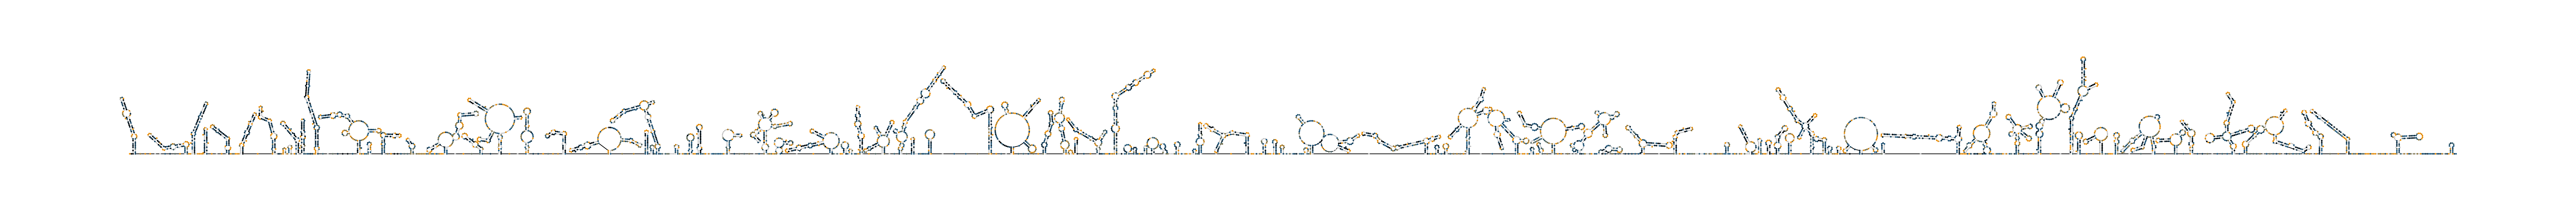

In [13]:
# predict structure of pre-rRNA
from src.dms_utils import fold_dms, get_coords, plot_structure
import pickle

# prediction takes a long time, prediction is provided
run_prediction = False
if run_prediction:
    dbr_nas = fold_dms(genome_rrna.seq, wild_nas.rat*wild_nas.vec_norm, mask_acu&wild_nas.mask, rnastructure_path='/Users/leo/Builds/RNAstructure/exe', md=150, l=30, max_rea=1)
else:
    with open('../data/rsample_nas_md150.pkl', 'rb') as f:
        shan_nas, E_nas, dbr_nas = pickle.load(f)


fig, axs = plt.subplots(figsize=(100, 8))
fig.patch.set_facecolor('white')

coords_nas = get_coords(genome_rrna.seq, dbr_nas)

plot_structure(coords_nas, genome_rrna.seq, wild_nas.rat*wild_nas.vec_norm, mask_acu&wild_nas.mask, axs=axs, circle_size=13, text_size=2, cmap_loc='../cmap.txt')
# plot_structure(coords_nas, genome_rrna.seq, wild_nas.rat*wild_nas.vec_norm, np.array(msk_num), axs=axs, circle_size=6, text_size=2, cmap_loc='../cmap.txt')
plt.show()


# Figure S4b

In [14]:
from tqdm import tqdm
from src.dms_utils import auroc

In [15]:
w = 150

# w must be even number so nt can be in the middle
if w%2 != 0:
    w += 1
    print(f"Adjusted window size to {w}.")

r_all = []

for i in tqdm(np.arange(0, len(dbr_nas), 1)):
    if i < w/2:
        r_all.append(np.nan)
    elif i >= len(dbr_nas)-1-w/2:
        r_all.append(np.nan)
    else:
        msk_x = (mask_acu&wild_nas.mask&np.array([i == '.' for i in dbr_nas]))[i-int(w/2):i+int(w/2)]
        msk_y = (mask_acu&wild_nas.mask&np.array([i != '.' for i in dbr_nas]))[i-int(w/2):i+int(w/2)]
        auroc_win = auroc((wild_nas.rat*wild_nas.vec_norm)[i-int(w/2):i+int(w/2)][msk_x], (wild_nas.rat*wild_nas.vec_norm)[i-int(w/2):i+int(w/2)][msk_y])
        r_all.append(auroc_win)
        
# overall auroc
x = (wild_nas.rat*wild_nas.vec_norm)[mask_acu&wild_nas.mask&np.array([i == '.' for i in dbr_nas])]
y = (wild_nas.rat*wild_nas.vec_norm)[mask_acu&wild_nas.mask&np.array([i != '.' for i in dbr_nas])]

auroc_overall = auroc(x, y)

100%|████████████████████████████████████████████████████████████████████████████████████████| 6858/6858 [00:06<00:00, 1046.34it/s]


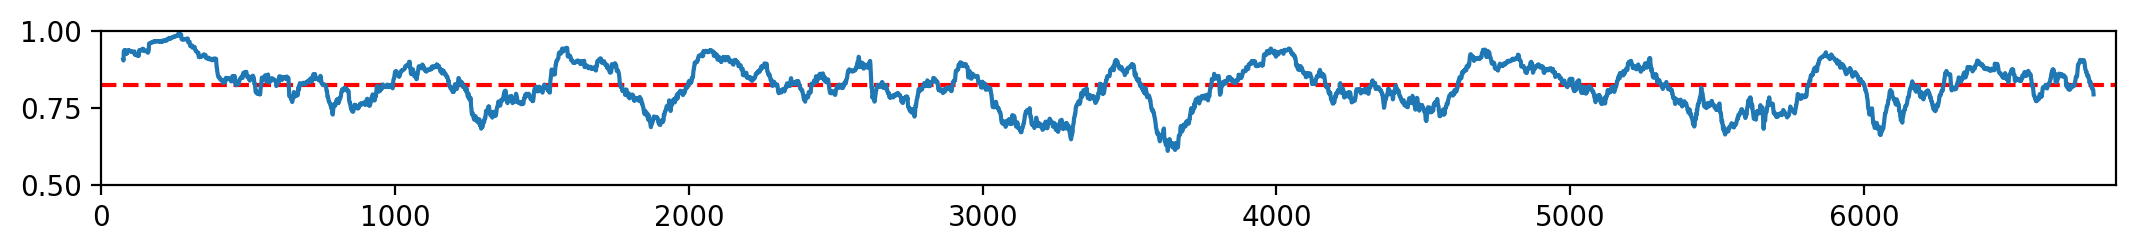

In [16]:
plt.figure(figsize=[13, 1])
plt.plot([0, len(dbr_nas)], [auroc_overall, auroc_overall], '--r')
plt.plot(r_all)
plt.ylim([0.5, 1])
plt.xlim([0, len(dbr_nas)])
plt.show()